# Deep Learning

## Part 1: Image Classification - Fashion MNIST (CNN)

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [1]:
# Install needed libraries
!pip install tensorflow==2.12.0 keras-tuner==1.4.7 pandas==1.5.3 numpy==1.23.5 scikit-learn==1.3.0 matplotlib==3.8.4

In [2]:
## Allow access to the code directory
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [3]:
# Load necessary libs and modules
from constants import *
from fashion_mnist_downloader import FashionMNISTDownloader
from fashion_mnist_loader import FashionMNISTLoader
from cnn import CNNTuner, CNN

## Convolutional Neural Network (section)

### Download the data (if needed)

In [4]:
fashion_mnist_path = os.path.join(base_path, FASHION_MNIST_DATA_PATH)

In [5]:
fashion_mnist_downloader = FashionMNISTDownloader(fashion_mnist_path)
fashion_mnist_downloader.download()

### Load the data

In [6]:
train_loader = FashionMNISTLoader(fashion_mnist_path, 'train')
train_set, validation_set = train_loader.load_data(validation_size=0.1, flatten_shape=False)
train_X, train_y = train_set
validation_X, validation_y = validation_set

test_loader = FashionMNISTLoader(fashion_mnist_path, 't10k')
test_X, test_y = test_loader.load_data(flatten_shape=False)
test_set = (test_X, test_y)

### Inspect dataset splits

In [7]:
print('Train Images: {}'.format(train_X.shape))
print('Train Labels: {}'.format(train_y.shape))
print('Validation Images: {}'.format(validation_X.shape))
print('Validation Labels: {}'.format(validation_y.shape))
print('Test Images: {}'.format(test_X.shape))
print('Test Labels: {}'.format(test_y.shape))

Train Images: (54000, 28, 28, 1)
Train Labels: (54000, 10)
Validation Images: (6000, 28, 28, 1)
Validation Labels: (6000, 10)
Test Images: (10000, 28, 28, 1)
Test Labels: (10000, 10)


### CNN Hyper-Parameter tuning

In [8]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
fashion_cnn_tuner = CNNTuner(train_set, validation_set,
                             tuner_directory, FASHION_MNIST_CNN_TUNER_PROJECT_NAME,
                             train_size=0.5)

In [9]:
fashion_cnn_keras_tuner = fashion_cnn_tuner.tune(epochs=10, batch_size=32)

Trial 10 Complete [00h 02m 02s]
val_loss: 0.32450586557388306

Best val_loss So Far: 0.2630614638328552
Total elapsed time: 00h 11m 07s


In [10]:
fashion_cnn_best_hyperparams = fashion_cnn_keras_tuner.get_best_hyperparameters()[0].values
fashion_cnn_best_hyperparams

{'kernel_size': 3,
 'kernel_stride': 1,
 'conv_filters': 64,
 'conv_activation': 'tanh',
 'num_layers': 1,
 'layer_0_kernel_size': 3,
 'layer_0_kernel_stride': 2,
 'layer_0_pool_size': 2,
 'layer_0_dropout': 0.35,
 'conv2dblock_0_filters': 128,
 'conv2dblock_0_activation': 'tanh',
 'dense_units': 256,
 'dense_dropout': 0.1,
 'learning_rate': 0.001,
 'layer_1_kernel_size': 3,
 'layer_1_kernel_stride': 2,
 'layer_1_pool_size': 2,
 'layer_1_dropout': 0.2,
 'conv2dblock_1_filters': 128,
 'conv2dblock_1_activation': 'tanh',
 'layer_2_kernel_size': 3,
 'layer_2_kernel_stride': 2,
 'layer_2_pool_size': 2,
 'layer_2_dropout': 0.15000000000000002,
 'conv2dblock_2_filters': 96,
 'conv2dblock_2_activation': 'tanh'}

### CNN Best Model Architecture

In [11]:
fashion_cnn_keras_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_block (Conv2DBlock)  (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,682,954
Trainable params: 1,682,954
Non-

### Fit the CNN

In [12]:
models_directory = os.path.join(base_path, MODELS_DIR)
fashion_cnn = CNN(models_dir=models_directory, weights_name=FASHION_MNIST_CNN_WEIGHTS,
                  class_ids=FASHION_MNIST_CLASS_IDS, class_labels=FASHION_MNIST_CLASS_LABELS)

In [13]:
fashion_cnn.fit(train_dataset=train_set, validation_dataset=validation_set, hyperparams=fashion_cnn_best_hyperparams)

Epoch 1/100
188/188 [==============================] - 1s 6ms/step
 — val_f1: 0.894017 — val_precision: 0.897998 — val_recall: 0.893167

Epoch 1: val_f1 improved from -inf to 0.89402, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_cnn.weights.h5
422/422 [==============================] - 22s 50ms/step - loss: 0.4396 - categorical_accuracy: 0.8412 - val_loss: 0.2969 - val_categorical_accuracy: 0.8932 - val_f1: 0.8940 - val_recall: 0.8932 - val_precision: 0.8980
Epoch 2/100
188/188 [==============================] - 1s 6ms/step
 — val_f1: 0.904783 — val_precision: 0.905465 — val_recall: 0.905333

Epoch 2: val_f1 improved from 0.89402 to 0.90478, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_cnn.weights.h5
422/422 [==============================] - 21s 51ms/step - loss: 0.2945 - categorical_accuracy: 0.8923 - val_loss: 0.2625 - val_categorical_accuracy: 0.9053 - val_f1: 0.9048 - va

### Plot training accuracy and loss curves

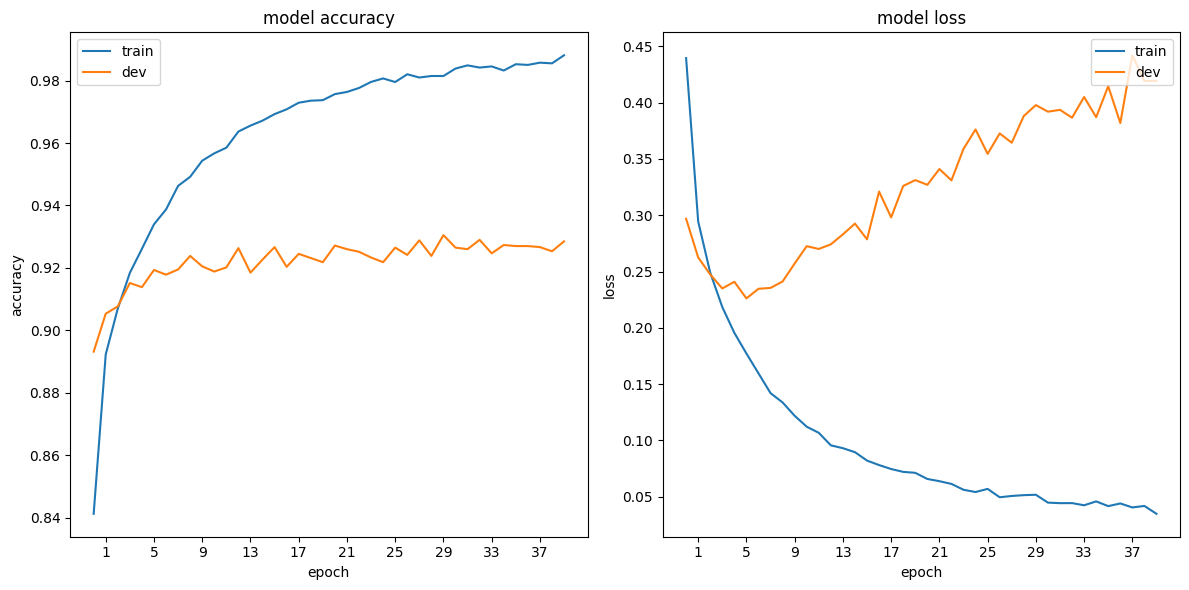

In [14]:
fashion_cnn.plot_curves()

### Evaluating the CNN on the training set (Classification Report)

In [15]:
train_classification_report_df, train_macro_average_df = fashion_cnn.classification_report(train_set)

1688/1688 [==============================] - 10s 6ms/step


In [ ]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.876344,0.875370,0.875857,0.953081
1,1,Trouser,0.997184,0.983704,0.990398,0.999317
2,2,Pullover,0.888408,0.799074,0.841377,0.928379
3,3,Dress,0.914085,0.939815,0.926771,0.979221
4,4,Coat,0.832676,0.860741,0.846476,0.921972
5,5,Sandal,0.981370,0.995000,0.988138,0.999576
6,6,Shirt,0.741958,0.785926,0.763309,0.868952
7,7,Sneaker,0.965884,0.975185,0.970512,0.996372
8,8,Bag,0.991259,0.987037,0.989144,0.999057
9,9,Ankle boot,0.986512,0.961667,0.973931,0.997684


In [16]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.995746,0.995741,0.995743,0.999772


### Evaluating the CNN on the validation set (Classification Report)

In [17]:
val_classification_report_df, val_macro_average_df = fashion_cnn.classification_report(validation_set)

188/188 [==============================] - 1s 6ms/step


In [18]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.897306,0.888333,0.892797,0.953950
1,1,Trouser,0.994966,0.988333,0.991639,0.998503
2,2,Pullover,0.891525,0.876667,0.884034,0.942167
3,3,Dress,0.933444,0.935000,0.934221,0.981961
4,4,Coat,0.891447,0.903333,0.897351,0.944136
5,5,Sandal,0.981788,0.988333,0.985050,0.997160
6,6,Shirt,0.799674,0.818333,0.808896,0.883761
7,7,Sneaker,0.963025,0.955000,0.958996,0.992592
8,8,Bag,0.989967,0.986667,0.988314,0.997689
9,9,Ankle boot,0.965000,0.965000,0.965000,0.994365


In [19]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.930814,0.9305,0.93063,0.968628


### Evaluating the CNN on the test set (Classification Report)

In [20]:
test_classification_report_df, test_macro_average_df = fashion_cnn.classification_report(test_set)

313/313 [==============================] - 2s 6ms/step


In [21]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.869828,0.862,0.865897,0.943102
1,1,Trouser,0.996926,0.973,0.984818,0.997593
2,2,Pullover,0.864039,0.877,0.870471,0.941686
3,3,Dress,0.908911,0.918,0.913433,0.969262
4,4,Coat,0.875374,0.878,0.876685,0.935850
5,5,Sandal,0.984048,0.987,0.985522,0.997921
6,6,Shirt,0.756219,0.760,0.758105,0.842626
7,7,Sneaker,0.964392,0.975,0.969667,0.995250
8,8,Bag,0.985944,0.982,0.983968,0.995562
9,9,Ankle boot,0.980808,0.971,0.975879,0.995456


In [22]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.918649,0.9183,0.918444,0.961431


## Remarks

- On the test set, using the Precision-Recall AUC per class, it is evident that the most difficult class to predict is Shirt, if we consider a threshold of 0.9

- The model is overfitting. Observe how the loss descends and at the 7th epoch it starts to ascend and keeps going higher.